In [2]:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import torch
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

directory = 'dreamfiles/dream4qnrand_type13_layer2_888/neuron3'
colors = cm.rainbow(np.linspace(0, 1, 100))
data = []

for filename in os.listdir(directory):
    df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
    data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), filename])

<Figure size 720x720 with 0 Axes>

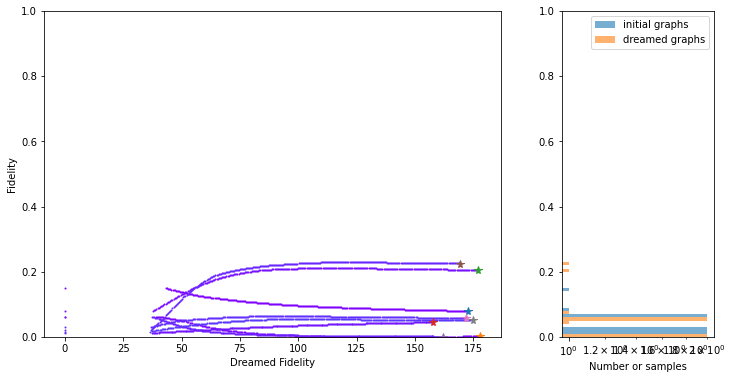

In [3]:
plt.figure(figsize=(10, 10))

#data = sorted(data, key=lambda x: x[0][0])
init = []
final = []
for ii, sample in enumerate(data):
    init.append(sample[0][0])
    final.append(sample[0][-1])
    
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(12, 6))
#plt.subplot(211)
for ii, sample in enumerate(data):
    #print(len(sample[1]))
    #print(sample)
    c = colors[ii]
    a0.scatter(sample[1], sample[0], color=c, s=1)
    a0.plot([sample[1][-1]], [sample[0][-1]], marker='*', markersize=8)

a0.set_ylim([0, 1])
a0.set_xlabel('Dreamed Fidelity')
a0.set_ylabel('Fidelity')

#plt.subplot(212)
bins = np.arange(0, 1, 0.01)  # fixed bin size
a1.set_ylim([0, 1])
a1.set_xscale('log')
a1.set_xlabel('Number or samples')
a1.hist(init, bins=bins, alpha=0.6, orientation="horizontal",label='initial graphs')
a1.hist(final, bins=bins, alpha=0.6, orientation="horizontal",label='dreamed graphs')
a1.legend(prop={'size': 10})

In [4]:
# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

DIM = [2] * 4
kets = hf.makeState('0000+1111')
state = fc.State(kets, normalize=True)
    
# Here, we average out what the neural network is seeing. 

def f3(noParts,DIM,applyFilter):
    filenames = [data[ii][2] for ii in range(len(data))]
    weightChange = []
    weightList = []
    for filename in filenames:
        print(f'{directory}/{filename}')
        df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
        initWeights = eval(df.iloc[0, 2])
        finalWeights = eval(df.iloc[-1, 2])
        weights = [b_i - a_i for b_i,a_i in zip(finalWeights,initWeights)]
        weightChange.append(weights)
        print("** Initial Weights **")
        print(initWeights)
        print("** Final Weights **")
        print(finalWeights)
        print("** Change in Weights **")
        print(weights)
        weightList.append(finalWeights)
        
    avgChange = [sum(sub_list) / len(sub_list) for sub_list in zip(*weightChange)]
    avgWeights =  [sum(sub_list) / len(sub_list) for sub_list in zip(*weightList)]
    #newChange = [w / max(avgChange) for w in avgChange]
    #newWeights = [w / max(avgWeights) for w in avgWeights]
    edges = th.buildAllEdges(dimensions=noParts * [DIM])
    graph = fc.Graph(edges=edges, weights=avgWeights)
    changeGraph = fc.Graph(edges=edges, weights=avgChange)
    if(applyFilter):
        graph.purge(threshold=4e-1*max(avgWeights),update=True)
        changeGraph.purge(threshold=4e-1*max(avgChange), update=True)
        graph = fc.Graph(edges=graph.edges, weights = graph.weights)
        changeGraph = fc.Graph(edges=changeGraph.edges, weights=changeGraph.weights)
    graph.getState()
    dreamstate = graph.state
    dreamstate.normalize()
    print(" ** Average Weights ** ")
    gp.graphPlot(graph)
    print("State")
    print(graph.state)
    print(f"Fidelity: {(state @ graph.state) ** 2}")
    print(" ** Unnormalized Weights ** ")
    print(graph)
    print(" ** Average Change in Weights ** ")
    print(changeGraph)
     

baza


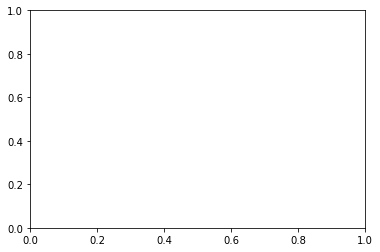

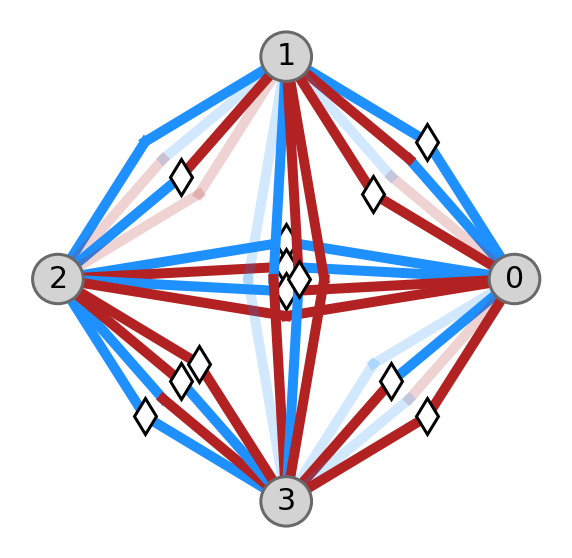

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



t:   0%|                                                                              | 0/20 [00:00<?, ?it/s, now=None]

baza


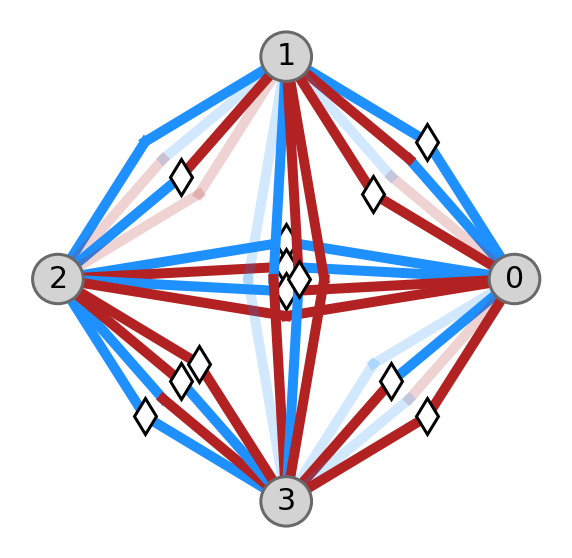

t:  10%|███████                                                               | 2/20 [00:00<00:01, 12.03it/s, now=None]

baza


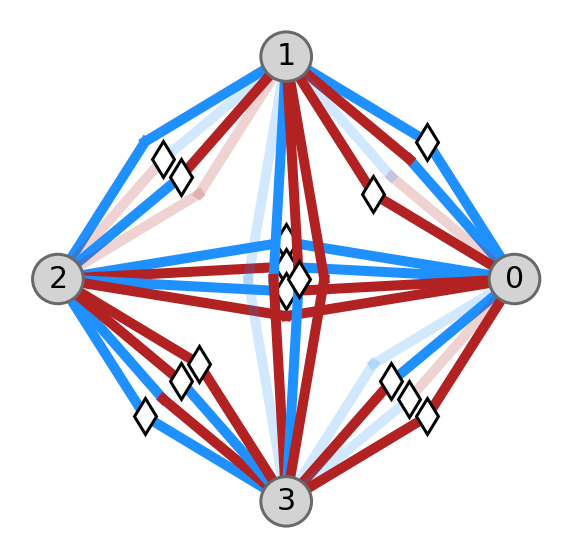

baza


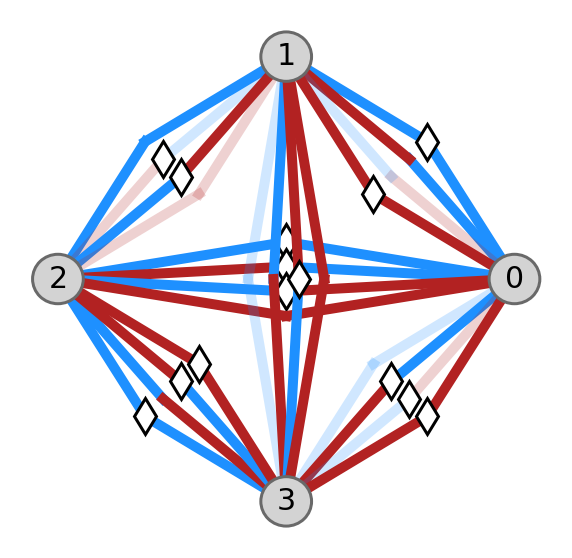

t:  20%|██████████████                                                        | 4/20 [00:00<00:02,  6.20it/s, now=None]

baza


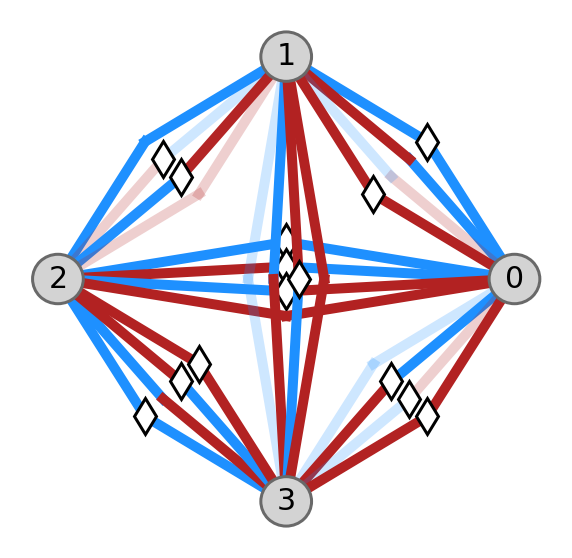

t:  25%|█████████████████▌                                                    | 5/20 [00:00<00:02,  6.25it/s, now=None]

baza


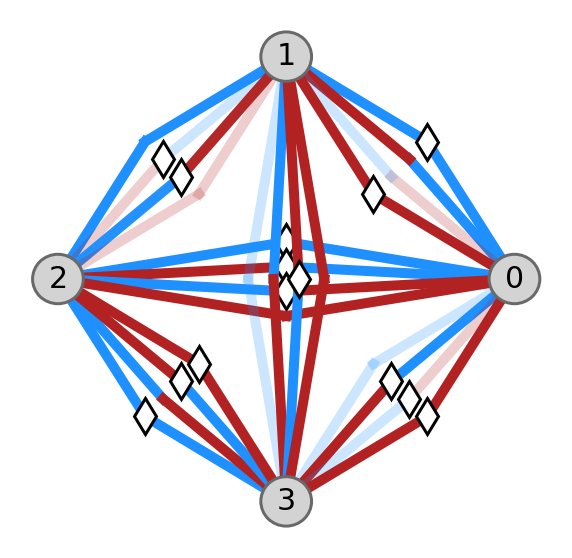

t:  30%|█████████████████████                                                 | 6/20 [00:00<00:02,  6.11it/s, now=None]

baza


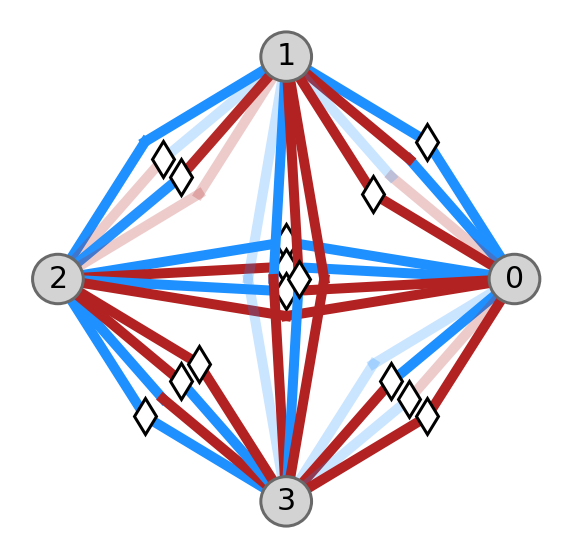

t:  35%|████████████████████████▌                                             | 7/20 [00:01<00:02,  6.03it/s, now=None]

baza


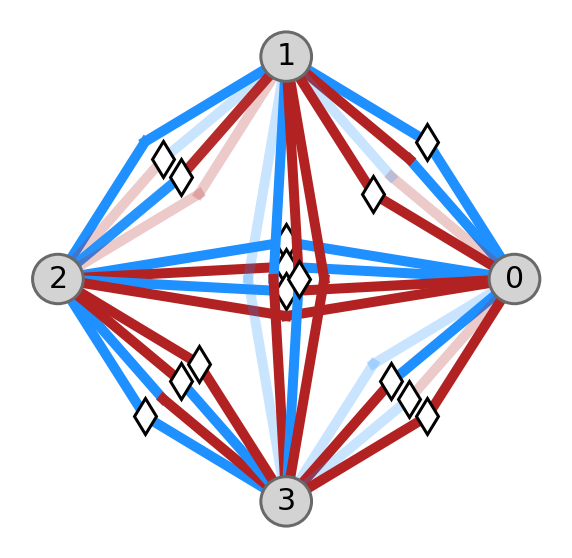

t:  40%|████████████████████████████                                          | 8/20 [00:01<00:02,  5.96it/s, now=None]

baza


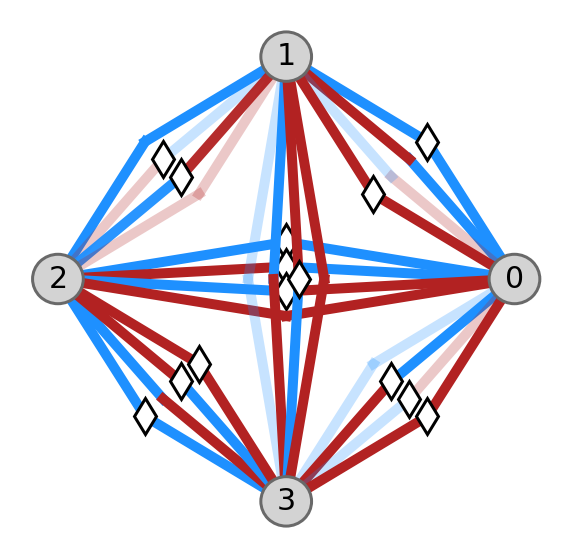

t:  45%|███████████████████████████████▌                                      | 9/20 [00:01<00:01,  5.93it/s, now=None]

baza


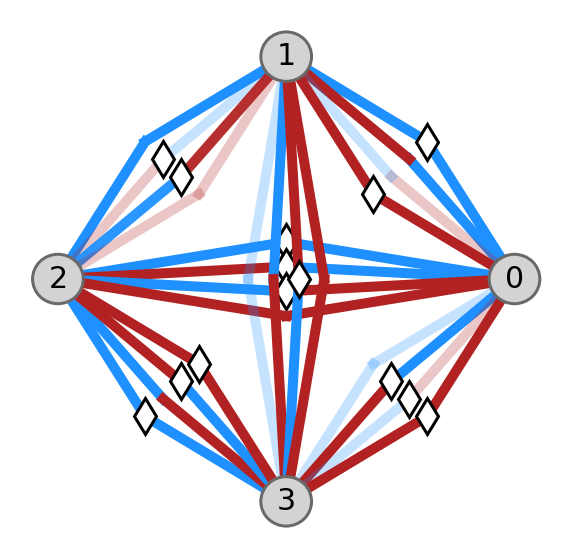

t:  50%|██████████████████████████████████▌                                  | 10/20 [00:01<00:01,  5.88it/s, now=None]

baza


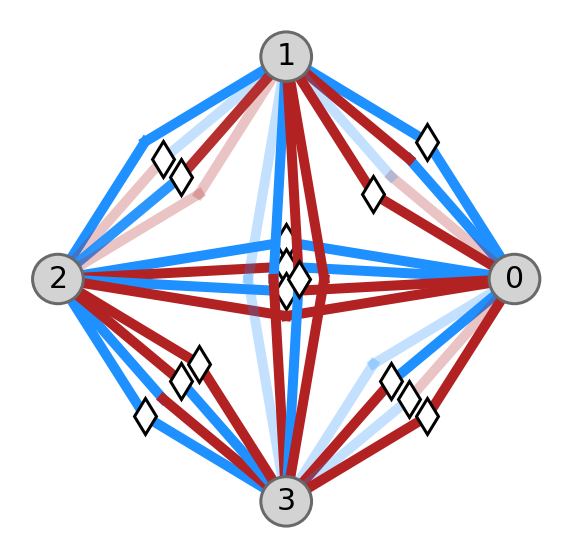

t:  55%|█████████████████████████████████████▉                               | 11/20 [00:01<00:01,  5.02it/s, now=None]

baza


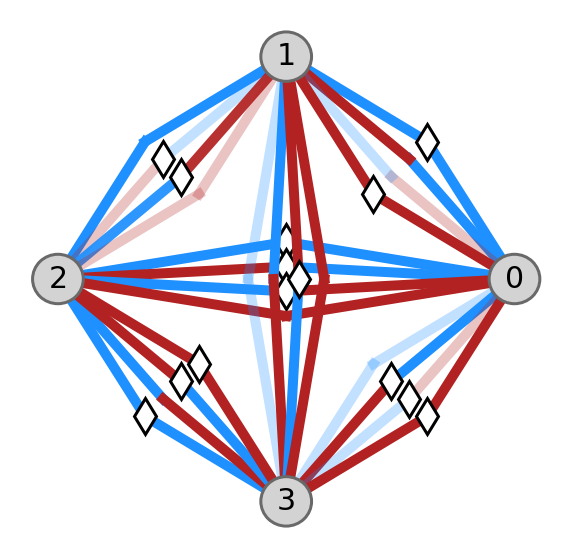

t:  60%|█████████████████████████████████████████▍                           | 12/20 [00:02<00:01,  5.27it/s, now=None]

baza


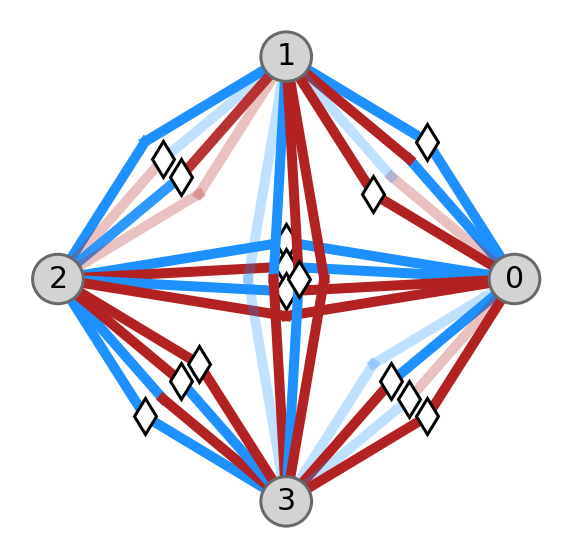

t:  65%|████████████████████████████████████████████▊                        | 13/20 [00:02<00:01,  5.41it/s, now=None]

baza


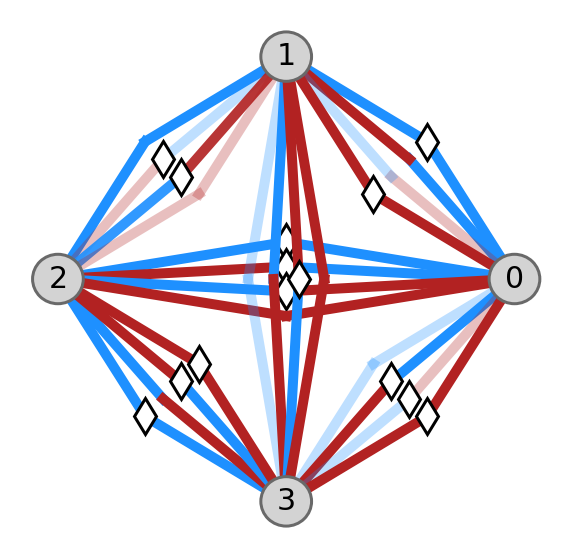

t:  70%|████████████████████████████████████████████████▎                    | 14/20 [00:02<00:01,  5.53it/s, now=None]

baza


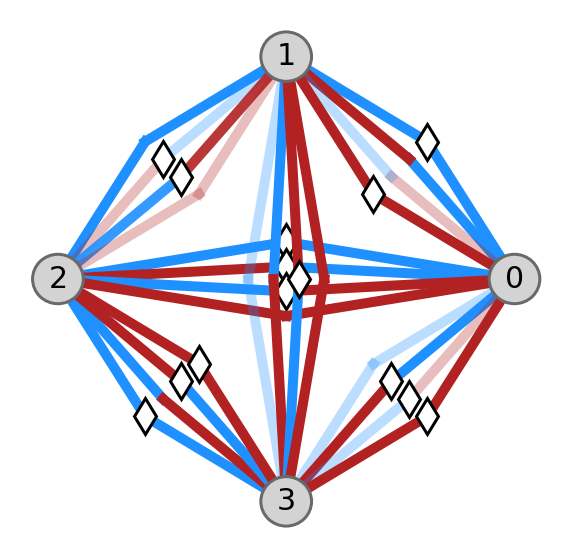

t:  75%|███████████████████████████████████████████████████▊                 | 15/20 [00:02<00:00,  5.60it/s, now=None]

baza


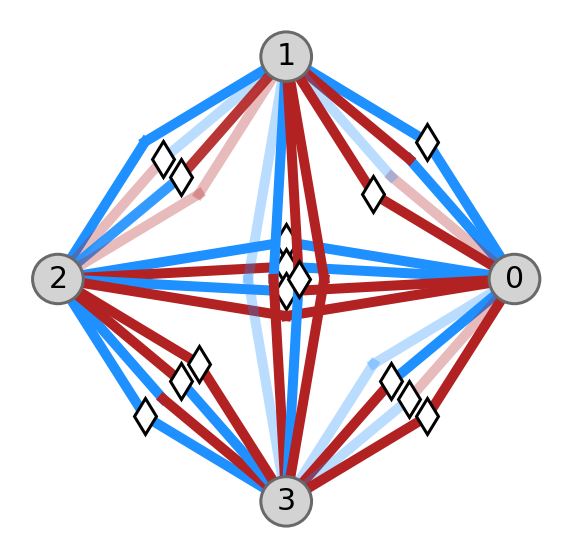

t:  80%|███████████████████████████████████████████████████████▏             | 16/20 [00:02<00:00,  5.68it/s, now=None]

baza


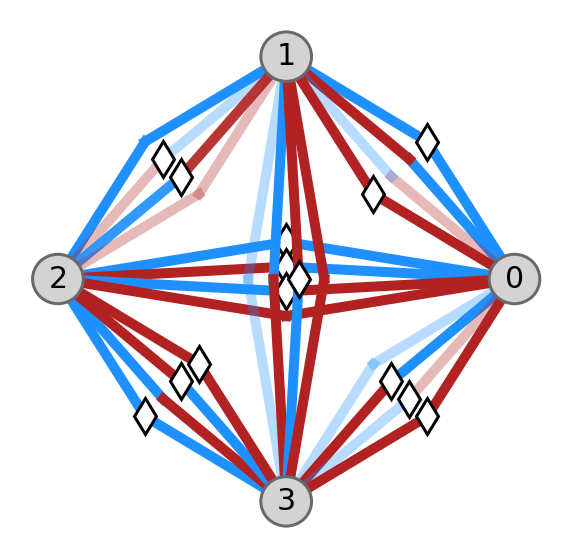

t:  85%|██████████████████████████████████████████████████████████▋          | 17/20 [00:03<00:00,  4.92it/s, now=None]

baza


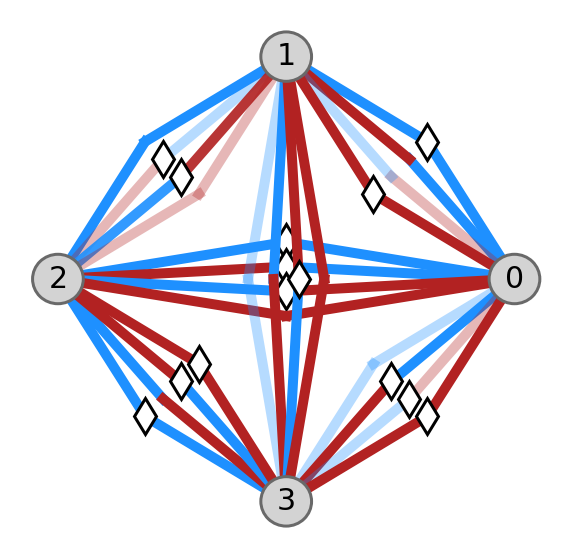

t:  90%|██████████████████████████████████████████████████████████████       | 18/20 [00:03<00:00,  5.18it/s, now=None]

baza


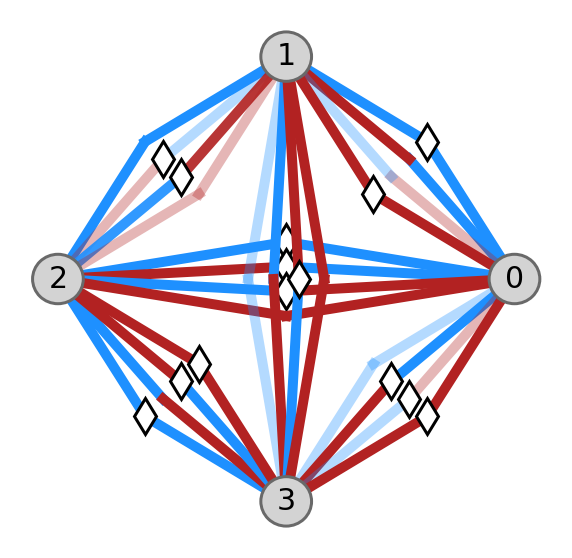

t:  95%|█████████████████████████████████████████████████████████████████▌   | 19/20 [00:03<00:00,  5.35it/s, now=None]

baza


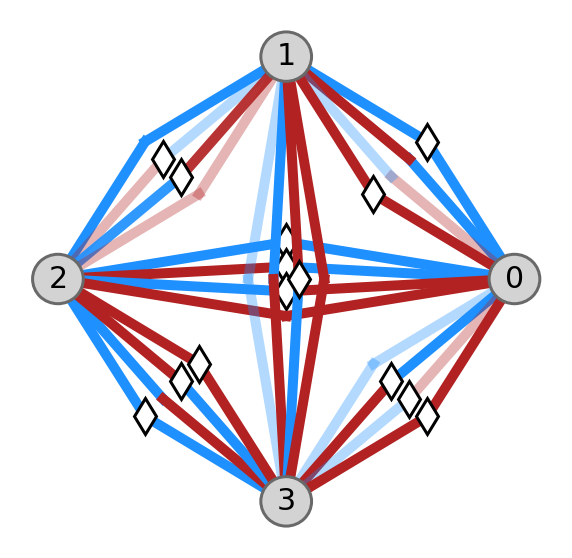

t: 100%|█████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.51it/s, now=None]

baza


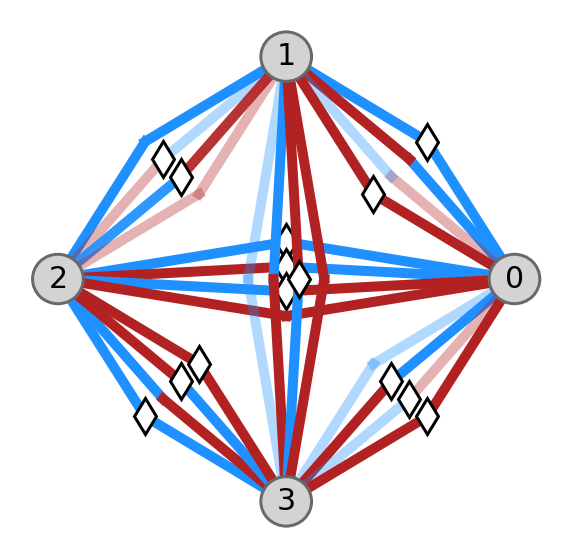

Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [8]:
# Make a movie of the evolution of the dreamed graph


fig, ax = plt.subplots()
def make_frame(t): 
    # Create graph
    
    filename = data[0][2]
    df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
    weights = eval(df.iloc[int(t), 2])
    edges = th.buildAllEdges(dimensions=4 * [2])
    graph = fc.Graph(edges=edges, weights=weights)
    
    print("baza")
    # returning numpy image
    return mplfig_to_npimage(gp.graphPlot(graph))
# View the complete evolution of the dreamed graphs (averaged out?)

def fmovie(duration):
   # duration of the video
    # method to get frames
    animation = VideoClip(make_frame, duration = duration) # importing matplot lib
    animation.ipython_display(fps = 1, loop = True, autoplay = True)

fmovie(20)